# IX. Stochastic processes and Markov Chains 

A stochastic process, also called a random process, generates a sequence of random variables over time: $X_1, X_2, X_3, \cdots$, where the subscript corresponds to the time stamp.  Here we restrict ourselves to discrete time stochastic processes, so that the time index takes on integer values.  An example discrete time, stochastic process is the closing price of a stock traded on the the NY Stock Exchange. The random variable we are measuring is the closing price of the stock and each day generates a new instantiation of the price. 



### Important features of of a stochastic process: 

### - Time series 

Observation of the random variable evolving in time. 

### - Autocorrelation 

Consider a window of a fixed length denoted as the lag and calculate tha sum of least squares in that window. Now slide the window over one and do it again. This is called a sliding time window. The length of the window is called the lag. 

### Old Faithful data as an example stochastic process

Let's revisit the data on eruptions of Old Faithful. This is an example of a stochastic process where in the HW assignment we looked at the one timestep dependence between the random variables. 

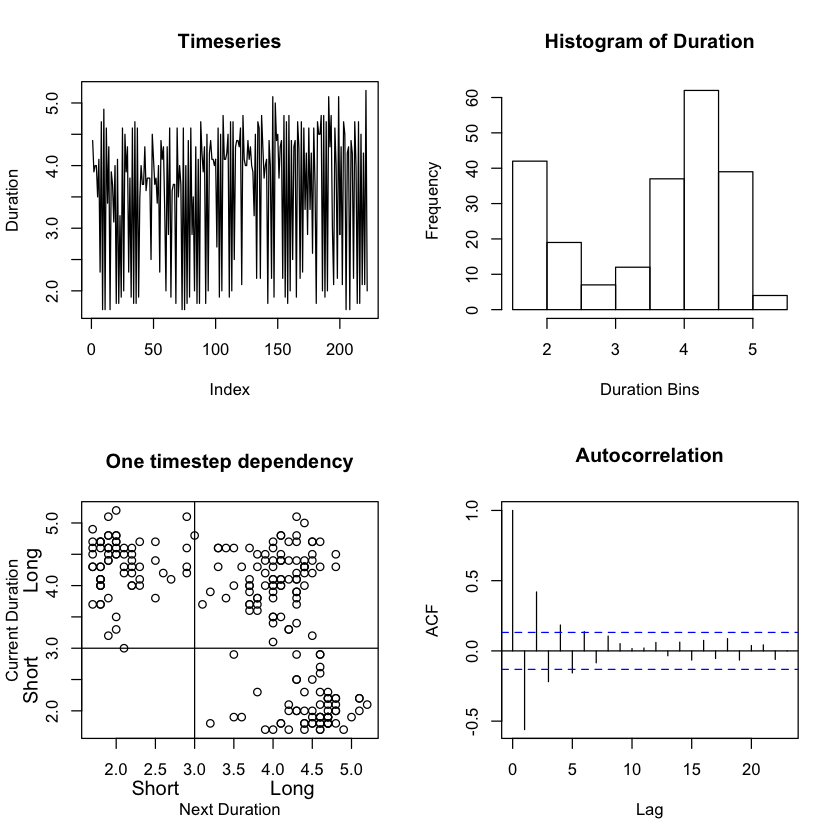

In [8]:
data = read.table(file="./Data/Old_Faithful.txt", header=TRUE)

par(mfrow=c(2,2))  # creates a 2x2 plotting area, with one plot in each quadrant

n = length(data[,1])

currentd = numeric(n-1)
nextd = numeric(n-1)

plot(data[,3], type = 'l', main="Timeseries", xlab="Index", ylab="Duration")

hist(data[,3], main="Histogram of Duration", ylab="Frequency", xlab="Duration Bins")

for (i in seq(0,n-1,1)) {
  currentd[i] = data[i,3]   # arrange the data appropriately 
  nextd[i] = data[i+1,3]
}

plot(nextd,currentd, main="One timestep dependency", ylab = "Current Duration", xlab = "Next Duration")
mtext(c("Short","Long"),side=1,line=2,at=c(2.5,4.25))
mtext(c("Short","Long"),side=2,line=2,at=c(2.5,4.25))
abline(v=3)
abline(h=3)


acf(data[,3], main="Autocorrelation")

**Autocorrelation in depth:**

Suppose $X_1, X_2, \ldots, X_n$ are observations at times $t_1, t_2, \ldots t_n$, then the $k$ lag auto-correlation is given by 

\begin{equation}
r_k = \frac{\sum_{i=1}^{n-k} (X_i - \bar{X})(X_{i+k} - \bar{X})}{\sum_{i}^{N}(X_i - \bar{X})^2} 
\end{equation}

where, $\bar{X}$  is the average value of the observations.  Note that when $k = 0$, $r_k = 1$. 


## Stochastic Process 

A stochastic process is a collection of random variables indexed by time. $X_1 , X_2, \ldots$ are random variables and the subscripts $1, 2, \ldots$ are steps in time.  Here we are considering a *discrete time* stochastic process, where time takes on discrete values. This is opposed to continuous time stochastic process in which time is continous and hence a real value.

The values assumed by the random variables $X_1 , X_2, \ldots$  are called **states** and  the set of all states is called the **state space**, $S=\{X_1, X_2, \ldots\}$.

**Evolution of the stochastic process:** If $X_1 = i$ and $X_2 = j$ then we say that the (stochastic) process made a transition from state $i$ to state $j$ in one time step (i.e. timestep 1 to timestep 2). Typically, we are interested in the long-run behavior. That is *after many transitions what are the probabilities of finding the process in each of the different states.*

### Introductory Example

On any particular day, denoted $n$, the weather on an island is described by a random varible $X_n$, where $n$ indexes the day. The weather can be classified either as sunny (denoted by $X=0$) or rainy (denoted by $X=1$). Once either a rainy or sunny pattern has begun it tends to continue for a while. If one day is sunny, the probability that the next day is also sunny is 0.97. Similarly, if one day is rainy, the probability that the next day is rainy is 0.94.  So the predicted value of $X_{n+1}$ depends on the value of $X_n$. 

The state space $S = \{0, 1\}$. Since the $X_n$'s are not independent random variables we can write down the following conditional probabilities representing the one-step transition probabilities:

\begin{eqnarray*}
  1 - \alpha &=& P(X_{n+1} = 0 \ | \ X_{n} = 0) \\
             &=& 0.97 \\[2mm]  
      \alpha &=& P(X_{n+1} = 1 \ | \ X_{n} = 0) \\
         &=& 0.03 \\[2mm]
   1 - \beta &=& P(X_{n+1} = 1 \ | \ X_{n} = 1) \\
             &=& 0.94 \\[2mm]
  \beta &=& P(X_{n+1} = 0 \ | \ X_{n} = 1) \\
         &=& 0.06
\end{eqnarray*}


We can also show this graphically using a **state diagram**

<img src="./Figures/2state-MarkovChainExample.jpg" width="600">


The blue circles represent the states and the arrows are the **one step state-transition probabilities**. 

To find the long-term dependencies for the probabilities we would need to find $P(X_n = i \ | \  X_{n-1} = i_{n-1}, X_{n-2} = i_{n-2}, \ldots , X_1 = i_1)$. This is not easy to find in the general case with arbitrary dependence among the random variables.


## Markov Chains

The figure above is an example of a 2-state, discrete-time Markov Chain. A Markov Chain is a mathematical model to capture **one-step dependence** in a stochastic process with a finite size state-space. Typically, we are interested in the long time behavior once the process no longer "remembers" what state it started in. 


**Example application**:  Random walk along the WWW graph. The structure of the WWW can be mapped into a network. The web pages are the nodes and the hyperlinks between pages connect them into a network. To determine the importance of a particular web page we can consider taking a discrete-time random walk along the web graph. In other words, start from a randomly chosen web page and at each time step follow a link on that page. We consider an un-biased walk, where all links are equally likely, so if a page links to $n$ other pages, it follows each link with probability $1/n$. The more in-links a page has, the more time the random walker will spend on that page. 

<img src="./Figures/graph-trans-rwalk.png" width="300">

In the example above, we have 5 web pages and the arrows show bi-directional links. (The dotted self-loops will have probability $p_{nn}=0$ if we require that the random walk leaves the page that it currently occupies.) Here we started on node 2, so at the next discrete time-step we can land on node 1 or node 4. We are interested in the **long term** behavior, when the random walk has no memory of the starting point. The long term (steady-state) probability of finding the random walk on a particular node is the core technology behind the celebrated [Page Rank algorithm](https://en.wikipedia.org/wiki/PageRank) at the foundation of Google's ranking algorithm.   

To set up a Markov Chain and solve for its long-term behavior will require you to remember your **linear algebra, particularly matrix multiplication and also the definitions of eigenvalues and eigenvectors.**


You may encounter the term *Hidden Markov Model (HMM)* as this is used extensively in Machine Learning where one fits an approximate Markov model to a data set. (i.e., capture the one-timestep dependence.) 

A Markov Model can have any number of states (so long as the number is finite).  Here we will only focus on 2-state, 3-state and 4-state Markov chains. 


## IX.A. 2-state discrete time Markov chains 

A 2-state Markov Chain is a sequence of random variables $X_n,\ ~n = 1, 2, \ldots$ where $X_n$ can take on only two values 0 and 1. The random variables are not independent of one another, and the Markov assumption is that the dependency is only one-step. Explicitly,

\begin{eqnarray*}
P(X_n = 1 \ | \ X_{n-1} = 0, X_{n-2} = i_{n-2}, \ldots , X_1 = i_1) &=& P(X_n = 1 \ | \ X_{n-1} = 0) \\
   &\equiv& p_{01}
\end{eqnarray*}


This implies that that next state only depends on the current state. The past and the future are conditionally independent given the future.

Let's define some symbols:

\begin{eqnarray*}
  p_{00} &=& P(X_n = 0 | X_{n-1} = 0) \\
         &=& 1 - \alpha \\[2mm]
  p_{01} &=& P(X_n = 1 | X_{n-1} = 0) \\
         &=& \alpha \\[2mm]
  p_{10} &=& P(X_n = 0 | X_{n-1} = 1)  \\
         &=& \beta \\[2mm]
  p_{11} &=& P(X_n = 1 | X_{n-1} = 1) \\
         &=& 1 - \beta
\end{eqnarray*}

Since we have states and transitions, and we are computer scientists, we should, at this point, have a nearly uncontrollable urge to write a state diagram as follows: 

<img src="./Figures/2state-MarkovChain.jpg" width="500">


### State transition matrix, P  

We can write this in the form of a matrix which is **one-step transition probability matrix**.

\begin{equation*}
  P =  \left[ \begin{array}{cc}
       p_{00} & p_{01} \\
       p_{10} & p_{11}
       \end{array} \right]
      = \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right].
\end{equation*}

To track the evolution of the system we have a vector encoding our initial condition and multiply it by $P$ to get the probabilities in the next step.  For instance, if we started in state 0, the initial vector $\lambda_0 = [1,0]$ and the probabilities of being at any state at time one $\lambda_1 = \lambda_0 P$. 

The elements of the vector $\lambda_r$ are the **state occupancy probabilities** at $r$-steps into the process. 

**Transition matrices** allow us to simplify the process of writing out transition probabilties for stochastic processes. In particular, they have 2 important properties:  


1. For a stochastic process with $n$ states, the transition matrix will be an $n\times n$ matrix.  


2. Since $P(S)=1$, we must end up in some state. Therefore, each row of a valid transition matrix will sum to 1.


Note that if each row must sum to 1 we call this a **right stochastic matrix** (the eigenvectors are *row-vectors* which are multiplied with the matrix on the right).  If $\Lambda$ is an eigenvector with eigenvalue $l$ then 

$$\Lambda P = l \Lambda$$

We could have alternatively chosen the convention that the entries in each column sum to 1. This is called a **left stochastic matrix** (the eigenvectors are *column-vectors* which are multiplied with the matrix on the left). If $\Lambda$ is an eigenvector with eigenvalue $l$ then 

$$P \Lambda = l \Lambda$$

In this class we use the right stochastic matrix convention. If the matrix satisfies a few conditions discussed later below, then there is a **stationary probability vector $\pi$**  defined as a distribution, written as a row vector, that does not change under application of the transition matrix. In other words $\pi$ is an eigenvector with eigenvale of 1. 

$$\pi P = \pi$$

The eigenvector $\pi$ describes the stationary distribution (the long-time, steady-state behavior).  Each element of the vector describes the probability of finding the Markov Chain in that state in the infinite time limit.  

For the 2-state Markov Chain the vector $\pi = [p_0, p_1]$, where $p_0$ is the probability of finding the Markov Chain in state 0 in the infinite time limit and $p_1$ is the probability of finding the Markov Chain in state 1 in the infinite time limit.  Thus we know that $p_0+p_1=1$. By definition $[p_0,p_1] P = [p_0,p_1]$. Doing the matrix calculation explicitly: 

\begin{eqnarray*}
  \pi P &=& (p_0, p_1)  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right] \\[2mm]
       &=& \left[ (1-\alpha)p_0 + \beta p_1, \alpha p_0 + (1-\beta)p_1\right] \ \ \ \ ({\rm doing\ the\ matrix\ multiplication})\\[2mm]
       &=& (p_0, p_1) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ({\rm from\ definition\ of}\ \pi)
\end{eqnarray*}

This gives us two equations:
\begin{eqnarray*}
&&(1-\alpha)p_0 + \beta p_1 = p_0\\[2mm]
&&\alpha p_0 + (1-\beta) p_1 = p_1 
\end{eqnarray*}

Solving these equations tells us that $p_0 = \frac{\beta}{\alpha}p_1$. This, together with the normalization condition that $p_0+p_1=1$ allows us to solve for $\pi$. 

#### The stationary distribution of P:

$$\pi = [p_0,p_1] = \left[ \frac{\beta}{\alpha+\beta}, \frac{\alpha}{\alpha+\beta}\right]$$

In other words, $p_0$ is the long-run probability that, regardless of what state you began in, you will end up in state 0. $p_1$ is the same for state 1. 


### Approach to the stationary distribution

The stationary distribution is in the asymptotic limit, when the system no longer has any memory of the state it started in (this is a more important issue for $N$-state Markov Chains instead of the 2-state Markov Chain -- they can take much longer to "forget" the initial condition). But what if we are interested in the shorter-time behavior? At the most basic, how do we go from the 1-step occupancy probabilities to compute the 2-step occupancy probabilities (i.e., the probabilities after two steps in the evolution)? 

**2-step dependence:**
Suppose we want to find $p_{00}(2)$ (i.e., that the chain started in state 0 and will be in state zero after two discrete time steps).  There are two possibilities:

- The chain started in state 0 and stayed in state 0 for both time steps:  $p_{00}p_{00}$

- The chain started in state 0 and transitioned to state 1 in step 1, and then transitioned from state 1 to state 0 in step 2:  $p_{01} p_{10}$.  

We can work this out more formally: 

\begin{eqnarray*}
p_{00}(2) &=& \underbrace{P(X_n = 0 | X_{n-2} = 0)}_\text{we show here for $n=3$ and $n-2 = 1$} \\[2mm]
         &=& P(X_3 = 0 | X_1 = 0) \\[2mm]
         &=& \frac{P(X_3 = 0 \cap X_1 = 0)}{P(X_1 = 0)} \\[2mm]
         &=& \underbrace{\frac{[P(X_3 = 0 \cap  X_2 = 0 \cap  X_1 = 0) + P(X_3 = 0 \cap  X_2 = 1 \cap  X_1 = 0)]}{ P(X_1 = 0) }}_{\text{Use the multiplication rule;}\ X_2 \ \text{can be 0 or 1}} \\[2mm]
         &=& \frac{P( X_1 = 0) P( X_2 = 0|X_1 = 0) P( X_3 = 0|X_2 = 0 \cap X_1 = 0)}{P(X_1 = 0)} \\[2mm]
         &+& \frac{P( X_1 = 0) P( X_2 = 1|X_1 = 0) P( X_3 = 0|X_2 = 1 \cap X_1 = 0)}{P(X_1 = 0)} \\[2mm]
         &=& p_{00} p_{00} + p_{10} p_{01} \\[2mm]
         &=& (1 - \alpha)^2 + \alpha \beta
\end{eqnarray*}


Note that $P(X_3 = 0|X_2 = 0 \cap X_1 = 0)$ is $P(X_3 = 0|X_2 = 0)$ because of our assumption that next state only depends on the current state.

**More generally** if we want to know all the probabilities after two steps we can calculate $P^2$. Recall above we wrote that by definition $\lambda_1 = \lambda_0 P$. Given the one-step time-dependence we can also write 

$$\lambda_2 = \lambda_1 P = (\lambda_0 P) P = \lambda_0 P^2$$

And, likewise, for $r$ steps along the process:

$$\lambda_r = \lambda_0 P^r$$

For large enough values of $r$ then $\lambda_r$ will converge to $\pi$ the stationary distribution. 

We have to remember the rules of matrix multiplication. In general we can use the Chapman-Kolmogrov equation

\begin{equation}
p_{i,j}^{2} = \sum_{k \in S} p_{ik} p_{kj}
\end{equation}


\begin{eqnarray*}
  \mathbf{P}^2 &=& \left[ \begin{array}{cc}
       p_{00} & p_{01}  \\
       p_{10} & p_{11}
       \end{array} \right] \left[ \begin{array}{cc}
       p_{00} & p_{01}  \\
       p_{10} & p_{11}
       \end{array} \right]  \\[2mm]
               &=& \left[ \begin{array}{cc}
       p_{00}p_{00} + p_{10} p_{01} & p_{00}p_{01} + p_{01} p_{11} \\
       p_{10}p_{00} + p_{11} p_{10} & p_{10}p_{01} + p_{11} p_{11}
       \end{array} \right] \\[2mm]
               &=&
       \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^2}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{eqnarray*}

In summary the state occupancy probabilities 2-steps into the process are: 
\begin{eqnarray}
p_{00}(2) &=& p_{00}p_{00} + p_{10} p_{01}\\[2mm]
p_{01}(2) &=& p_{00}p_{01} + p_{01} p_{11}\\[2mm]
p_{10}(2) &=& p_{10}p_{00} + p_{11} p_{10}\\[2mm]
p_{11}(2) &=& p_{10}p_{01} + p_{11} p_{11}
\end{eqnarray}


**r-step dependence:**
Beyond two-step dependence we want to calculate $p_{ij} (r)$ which is probability that the process transitions from state $i$ to state $j$ in $r$ steps. As we derived above

$$\lambda_r = \lambda_0 P^r$$

As $r \rightarrow \infty$ then $\lambda_r$ converges to the steady-state probability distribution $\pi$.

Now we just need to calculate $P^r$.  First some technical details. 

### Technical details: 

However, before we begin, we must check that our Markov Chain is **ergodic**.  That is, all of its states are **recurrent** (at least for our purposes). A state is recurrent if it is possible to leave that state once it is entered. Otherwise it would be **absorbing**. We also want the Markov Chain to be **irreducible** meaning that all of the states can eventually be reached independent of the starting state. (In the language of networks, every state is in the connected network and has both in-links and out-links.) 

<img src="./Figures/graph-trans-rwalk.png" width="250">

### The Perron-Frobenius theorem: 

The Perron-Frobenius theorem of linear algebra tells us that if a matrix is

1) Stochastic (either row or column normalized)

2) Irreducible 

3) Postive (meaning every entry is greater than zero)

then there is guaranteed to be one leading eigenvalue with $\lambda_1=1$ and all other eigenvalues are less than one. There is an associated leading eigenvector (which we denote as $\pi$) with strictly positive entries. 

This theorem has important applications to probability theory (ergodicity of Markov chains); to the theory of dynamical systems; to economics; to Internet search engines (PageRank); and even to ranking of football teams.



### Calculating $P_r$: 

Another way of checking ergodicity is to assert that all transition probabilities *between states* need to fall *between* 0 and 1, or, in the case of the given example, $0 < | 1-\alpha-\beta | < 1$. We can use that to calculate the $r \rightarrow \infty$ value of $P^r$. We can show that


\begin{equation*}
  P^r = \frac{1}{\alpha + \beta}
      \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right] ~+~ \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}
       \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]\\
\end{equation*}


If 
\begin{equation*}
0 < |1 - \alpha - \beta| < 1 
\end{equation*} 
then $P^r$ converges geometrically as $r \rightarrow \infty$ to

\begin{equation*}
  P^\infty = \frac{1}{\alpha + \beta}
      \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
\end{equation*}


The long-run probability distribution is the same as we calculated above $\pi = [ p_0 , p_1]$,

\begin{equation*}
  [ p_0 , p_1] = \left[ \frac{\beta}{\alpha + \beta}, \frac{\alpha}{\alpha + \beta}\right]
\end{equation*}

Starting from any initial configuration you will end up with $\pi$ for large enough $r$.  For instance consider starting in state 0, so $\lambda_0 = [1,0]$. For large enough $r$ 

\begin{equation*}
\lambda_0 P^\infty = [1,0] \left( \frac{1}{\alpha + \beta}
      \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]\right) 
       = \left[ \frac{\beta}{\alpha + \beta}, \frac{\alpha}{\alpha + \beta}\right]
\end{equation*}


You can also think about it this way: $p_0$ is the long-run probability that, regardless of what state you began in, you will end up in state 0. $p_1$ is the same for state 1, and so on.

### Proof by induction 

For a two state Markov Chain with a 1-step transition probability $\mathbf{P}$ given by

\begin{equation*}
  \mathbf{P} = \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right]
\end{equation*}


we said that $\mathbf{P}^r$ is given by

\begin{equation*}
  \mathbf{P}^r = \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{equation*}

Prove the equation  by mathematical induction as follows. As a initial step verify that the equation is correct for $r = 1$. Then do the induction step.  Assuming it is true for $\mathbf{P}^r$ show that it is true for $\mathbf{P}^{r+1}$.

### Solution

We first show that the above relation is true for $r = 1$.

\begin{eqnarray*}
  \mathbf{P}^1 &=& \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right] \\[2mm]
      &=& \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right] \\[2mm]
      &=& \mathbf{P}
\end{eqnarray*}


Now we assume that it is true for $r$  and find $\mathbf{P}^{r+1}$.

\begin{eqnarray*}
  \mathbf{P}^{r+1} &=& \mathbf{P}^r \times \mathbf{P} \\[2mm]
          &=& \left (\frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^r}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right] \right ) \times  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right] \\[2mm]
       &=& \text{After some algebra} \\[2mm]
       &=& \frac{1}{\alpha + \beta} \left[ \begin{array}{cc}
       \beta & \alpha \\
       \beta & \alpha
       \end{array} \right]
       + \frac{(1 - \alpha - \beta)^{r+1}}{\alpha + \beta}  \left[ \begin{array}{cc}
       \alpha & -\alpha \\
       -\beta & \beta
       \end{array} \right]
\end{eqnarray*}



### Interpreting the Long-run Distribution

For a discrete time Markov Chain: after a large number of discrete time-steps what is the probability of finding the process in the different states. You can think of this as people travelling between destinations or quantities of sand or water. Eventually, this particular system will reach some kind of equilibrium, and that's precisely what we are after.


### Example 2 - Highway Exit 

To monitor the flow of traffic exiting a busy freeway into an industrial
area, the highway department has a TV camera aimed at traffic on a one-lane exit ramp. Each vehicle that passes in sequence can be classified as Light (for example, an automobile, van, or pickup truck) or Heavy (a heavy truck). Suppose data indicate that a Light vehicle is followed by another Light vehicle 70% of the time and that a Heavy vehicle is followed by a Heavy vehicle 5% of the time.

We will denote a heavy vehicle by 1 and a light vehicle by 0. Let $X_n$ denote the stochastic process where $n$ is the discrete index variable. The state space $X = \{0,1\}$.  This is a 2-state Markov chain with the transition matrix given by

\begin{eqnarray*}
  P &=&  \left[ \begin{array}{cc}
       1 - \alpha & \alpha \\
       \beta & 1 - \beta
       \end{array} \right]  \\[2mm]
    &=&  \left[ \begin{array}{cc}
       0.70 & 0.30 \\
       0.95 & 0.05
       \end{array} \right]
\end{eqnarray*}


1. What assumptions are necessary for the Heavy-Light process to be a homogenous 2-state Markov Chain? Do these assumptions seem realistic? (One reason the process may not be independent is a traffic law that forbids Heavy trucks from following one another within a certain distance on the freeway. The resulting tendency towards some sort of (spacing between Heavy trucks may carry over to exit ramps.)

We assume  that one-step transition probabilities are time homogeneous, i.e., they do not change with time. This assumption may not be very realistic considering the fact that the composition of the vehicles will change with time-of-day.


2. If we see a Heavy vehicle in the monitor now, what is the probability that the second vehicle after it will also be Heavy? The fourth vehicle after it?

Find $P^2$. The $i=1, j=1$ entry of $P^2$ gives the probability. For the second part, find $P^4$ and get the $i=1, j=1$ entry. We can easily do this in R. The following code was used to generate $P^2$ and $P^4$.


In [2]:
P = matrix(c(0.7,0.3,0.95,0.05), nrow=2, ncol=2, byrow=TRUE, dimnames=list(c(0,1), c(0,1)))
P
P2 = P%*%P   # Note the notation %*% for matrix multiplication
P2
P4 = P2%*%P2
P4

,0,1
0,0.70,0.30
1,0.95,0.05


,0,1
0,0.7750,0.2250
1,0.7125,0.2875


,0,1
0,0.7609375,0.2390625
1,0.7570312,0.2429687


3. If we see a Light vehicle in the monitor now, what is the probability that the second vehicle after it will also be Light? The fourth vehicle after it?
  We can get the answers from P2 and P4 matrices shown above


4. In the long run, what proportion of the vehicles on this ramp do you suppose is Heavy?
  If we compute $P^8$ and $P^{16}$ we see that rows converge (almost for $P^8$ and completely for $P^{16}$).
  

In [3]:
P8 = P4%*%P4
P8
P16 = P8%*%P8
P16

,0,1
0,0.7600037,0.2399963
1,0.7599884,0.2400116


,0,1
0,0.76,0.24
1,0.76,0.24


in the long run, the proportion of heavy vehicles is 0.24.

5. How might an observer of this Markov process readily notice that it differs from a purely independent process with about 24% Heavy vehicles.

6. In practice, one would estimate the probability that a Heavy vehicle is followed by another Heavy one by taking data. If about 1/4 of the vehicles are Heavy, about how many Heavy vehicles (paired with the vehicles that follow immediately behind) would you need to observe in order to estimate this probability accurately enough to distinguish meaningfully between a purely independent process and a Markov process with dependence?


## IX.B. 3-state discrete time Markov chains 

This is the same philosophy as the 2-state Markov Chain, except now there are 3-states and 9 distinct transtion probabilities.  Shown below is the general state diagram on the left and the general state transition matrix on the right.  

<img src="./Figures/3state-MarkovChain.png" width="750">


### Example 3 - Processor Sleep State 

A processor has sleep states 1, 2, and 3. In each state, certain components are shut down and different amounts of current are used. In practice the transitions between the different  states could depend on user actions. The figure below shows the state diagram for this process.

<img src="./Figures/processor-sleep-states.jpg" width="750">


The State-Transition Matrix of this Markov Chain is as follows:  

\begin{equation*}
  P = \left[ \begin{array}{lll}
        0.7 & 0.2 & 0.1 \\
        0.3 & 0.5 & 0.2 \\
        0.2 & 0.4 & 0.4 \\
       \end{array} \right]
\end{equation*}
1. Find the probability of going from state 2 to 3 to 1.  
2. Find the probability of going from state 2 to 1 in 2 transitions.  
3. Find the stationary distribution for this process. In the long-run this will be the proportion of time spent in each of the sleep states, regardless of the starting state.

**Solution:**  
1) For the first part,

\begin{align}
&P(X_2=1, X_1 = 3 | X_0 = 2) \\
 &=P(X_2=1 | X_1=3\cap X_0=2) \\
 &=P(X_2=1|X_1=3)\cdot P(X_1=3|X_0=2) \\
 &=p_{23}p_{31} \\
 &=0.2\cdot 0.2 = 0.04
\end{align}

This result makes sense because I have told you what the intermediate state is. Without using the laws of conditional probability, you could just as easily surmise that this would employ the multiplication rule on the probabilities of the two given transitions.

2) For the second part, however, we must take into account all the possible intermediate states:

\begin{align}
p_{21}^{(2)} &= \sum_{k=1}^3 p_{2k}p_{k1} \\
&=p_{21}p_{11}+p_{22}p_{11}+p_{23}p_{31}  \\
&=0.3\cdot 0.7+0.5\cdot 0.3+0.2\cdot 0.2 = 0.4
\end{align}

3) For the final part, we must determine the stationary distribution of this function. In order to do this, we will solve for $\pi$, the vector of steady-state probabilities. Recall this is the vector $\pi$ which, when multiplied by $P$, returns itself ($\pi$ is an eigenvector of $P$ with eigenvalue equal to 1).  Since $P$ is right-stochastic matrix $\pi$ is a row vector. We will write $\pi = [\lambda_1~\lambda_2~\lambda_3]$. Thus:

\begin{equation*}
\left[ \lambda_1~\lambda_2~\lambda_3 \right] \left[ \begin{array}{lll}
        0.7 & 0.2 & 0.1 \\
        0.3 & 0.5 & 0.2 \\
        0.2 & 0.4 & 0.4 \\
       \end{array} \right] = \left[ \lambda_1~\lambda_2~\lambda_3 \right]
\end{equation*}

We also know that $\lambda_1+\lambda_2+\lambda_3 = 1$ because the probabilty of being in any of the 3 states must be equal to 1, even in the stationary distribution. We can solve this system of equations long-form by hand, or we could use Linear Algebra and solve it through a series of matrix manipulations, or we can use R. 

### Solving the equations with linear algebra 

This now reduces nicely to solving 4 equations to find 3 variables. The last equation is not necessary (3 equations suffices to find the 3 unknowns) so we'll go ahead and replace the last equation with the normalization fact:

\begin{align}
0.7\lambda_1  + 0.3\lambda_2 + 0.2\lambda_3 &= \lambda_1 \\
0.2\lambda_1  + 0.5\lambda_2 + 0.4\lambda_3 &= \lambda_2 \\
\lambda_1     + \lambda_2    + \lambda_3    &= 1
\end{align}

First, looking at the above system of equations, $\lambda_1$ and $\lambda_2$ appear more often than they have to, so let's subtract them from both sides, allowing us to se the right-hand sides of those equations to 0:
\begin{align}
-0.3\lambda_1  + 0.3\lambda_2 + 0.2\lambda_3 &= 0 \\
0.2\lambda_1  - 0.5\lambda_2 + 0.4\lambda_3 &= 0 \\
\lambda_1     + \lambda_2    + \lambda_3    &= 1
\end{align}
Now, we can rewrite the above as a matrix equation:
\begin{equation*}
\pi A = \left[0,0,1\right]
\end{equation*}

Where

\begin{equation*}
A= \left[ \begin{array}{lll}
        -0.3 & 0.2 & 1 \\
        0.3 & -0.5 & 1 \\
        0.2 & 0.4 & 1 \\
       \end{array} \right] 
\end{equation*}

In order to solve for $\pi$ by itself, we can multiply both sides by $A^{-1}$, getting 

\begin{equation*}
\pi = A^{-1} \left[ 0,0,1 \right]
\end{equation*}

Which essentially means that if we take the inverse of $A$ and only look at the last row, we'll have our stationary distribution.   

To sum up, to use linear algebra to solve for $\pi$ given the stochastic matrix $P$:

1. Translate the rows into columns.  
2. Subtract 1 from the diagonal.  
3. Set the last column to 1.  
4. Take the inverse.  
5. The last row of the inverse is $\pi$.

## IX.C. Solving for the steady-state distribution $\pi$ with R

Of course we can use R to calculate the eigenvalues and eigenvectors of a matrix. In fact there is a package for calculating properties of Markov chains in R call [markovchain](https://CRAN.R-project.org/package=markovchain).  There is extensive documentation for this package ([You can dowload this pdf file](https://cran.r-project.org/web/packages/markovchain/vignettes/an_introduction_to_markovchain_package.pdf).)

Recall the Perron-Frobenius theorem discussed above. So long as the matrix is stochastic, irreducible and positive, we are guaranteed a unique leading eigenvalue $\lambda_1 = 1$ and its corresponding (normalized) eigenvector is $\pi$ the vector of the stationary probability distribution. 

Here we will use raw R code. First we will declare a matrix and specify all of the transition probabilities, ensuring the matrix is right-stochastic.  Then we will use the "eigen" function in R. Unfortunately, that function assumes left-matrix multiplication, not right-matrix multiplication.  But no problem, the right eigenvectors of a matrix are equal to the left eigenvectors of its transpose. So we will use the "t" function in R, which takes the transpose of a matrix. 

In [29]:
m = matrix(0, nrow=3,ncol=3)  #define a vector
m[1,] = c(0.7,0.2,0.1)        #specify the row entries
m[2,] = c(0.3,0.5,0.2)
m[3,] = c(0.2,0.4,0.4)
print(m)

e = eigen(t(m))               #solve for the eigenvalues and eigenvectors of the transpose matrix
print(e)                      #Note, the leading eigenvalue is 1, and all the rest are smaller

pi = e$vectors[,1]/sum(e$vectors[,1])  #Extract the corresponding eigenvector and normalize it
print(pi)

     [,1] [,2] [,3]
[1,]  0.7  0.2  0.1
[2,]  0.3  0.5  0.2
[3,]  0.2  0.4  0.4
eigen() decomposition
$values
[1] 1.0000000 0.4414214 0.1585786

$vectors
          [,1]       [,2]       [,3]
[1,] 0.7678053  0.8125199  0.2325878
[2,] 0.5584039 -0.4759631 -0.7941045
[3,] 0.3141022 -0.3365568  0.5615167

[1] 0.4680851 0.3404255 0.1914894


## 3 ways to assess $\pi$ the Long-run Distribution

1. Direct simulation. Simulate a large number of time steps and determine proportion of times the process is in different states. This gives an approximate value of $\pi$. 


2. Multiply $P$ by itself repeatedly (i.e., compute $P^r$) until the row values do not change. The value of $r$ for which we converge to $\pi$ (i.e., row values do not change) would depend on the specifics of the matrix element entries. 


3. Solve directly for $\pi = \pi P$ using linear algebra or R including the additional constraint that $\sum_{i \in S} \pi_i = 1$

## IX.D. Discrete-time Markov Chains with Large Finite State Space

Now we consider a $K$-state Markov Chain. Thus the state space $S = \{1, 2, \ldots, K \}$. The Markov property limits the dependency of the next state only to the current state. Thus

\begin{eqnarray*}
p_{ij} &=& P(X_n = j | X_{n-1} = i, X_{n-2} = i_{n-2}, \ldots, X_1 = i_1  \\
         &=& P(X_n = j | X_{n-1} = i) \\
\end{eqnarray*}


As before, we consider a time-homogenoeus Markov Chain and  $P$ is a $K \times K$ matrix where the $(i,j)$ entry is is $p_{ij}$. As before we can show that

\begin{equation*}
  p_{ij} (2) = \sum_{m \in S} p_{im} p_{mj} ~~~~ \text{for  } i, j \in S
\end{equation*}


The above equation is called the Chapman-Kolmogrov Equation and easy to prove  by using the conditional probability and the Markov Property.

As before $p_{ij} (2)$ is the $(i,j)$th entry in $P^2$ and $p_{ij} (r)$ is the $(i,j)$th entry in $P^r$.  Furthermore,

\begin{equation*}
\lim_{r \rightarrow \infty} P^r = \Lambda
\end{equation*}

where the limiting matrix $\Lambda$ has $K$ identical rows, i.e., $\bar{\lambda} = [\lambda_1, \lambda_2, \ldots, \lambda_K]$ where

\begin{equation*}
  \lambda_j = \lim_{r \rightarrow \infty} P(X_r = j | X_1 = i)  ~~~ \text{for any  } i, j \in S
\end{equation*}


It is easy to use R to solve for $\pi$ for values of $K$ that are considerably large. 


### Example 4 -  Application in Genomics

Human genome consists of 4 nucleotides: A - Adenine (denoted by 1), C - Cytosine (denoted by 2), G - Guanine (denoted by 3) and T - Thyamine (denoted by 4). In some area of the DNA strand dinucleotide Cytosine-Guanine (CpG - C preceeding G) gets mutated to TpG. In CpG island these mutations are suppressed and one see more C, G, and CpG than in other parts of the genome.

Progression of nucleotides in a strand of DNA is modelled by a 4-state Markov Chain and the probability transition matrix is given by

\begin{equation*}
  P = \left[ \begin{array}{llll}
       0.180 & 0.274 & 0.426 & 0.120  \\
       0.171 & 0.368 & 0.274 & 0.188 \\
       0.161 & 0.339 & 0.375 & 0.125 \\
       0.079 & 0.355 & 0.384 & 0.182\\
       \end{array} \right]
\end{equation*}


If we calculate $P^5$ we can see that the rows are equal and $\bar{\lambda} = (0.155, 0.341, 0.350, 0.154)$.


What is the proportion of CG?

This is given by

\begin{eqnarray*}
  P(X_n = 2, X_{n+1}=3) &=& P(X_n = 2) P(X_{n+1}=3 | X_n = 2) \\
                        &=& \lambda_2 p_{23} \\
                        &=& 0.341 \times 0.274 \\
                        &=& 0.093
\end{eqnarray*}

If we had assumed an independent process,

\begin{eqnarray*}
  P(X_n = 2, X_{n+1}=3) &=& P(X_n = 2) P(X_{n+1}=3) \\
                        &=& \lambda_2 \lambda_3 \\
                        &=& 0.341 \times 0.350 \\
                        &=& 0.12
\end{eqnarray*}

